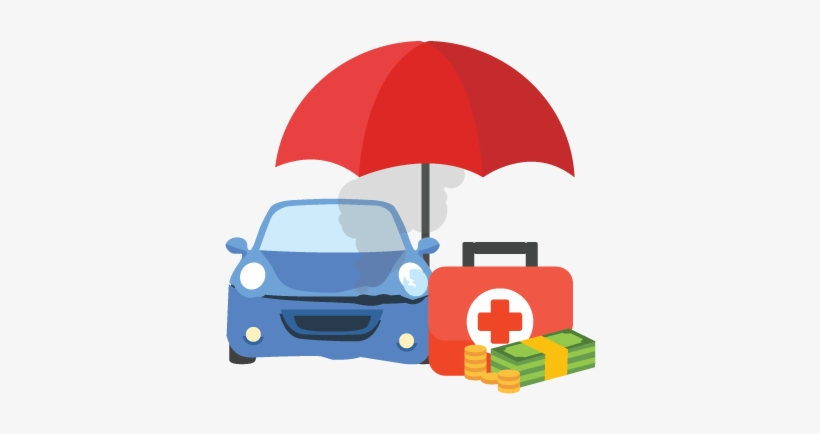

# Context 

An Insurance company that has provided Health Insurance to its customers now wants to obtain a model to predict whether their customers from the past year would also be interested in Vehicle Insurance provided by the same company.

**Useful terms:**

 > _An_ **insurance policy** _is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium._

 > _A_ **premium** _is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee._

As in case of the medical insurance, the vehicle insurance is where every year the customers need to pay a _premium_, a certain amount of money, for insurance to the insurance provider company, so that in case anything happens to the vehicle, the insurance provider company will provide a compensation to the customer.

The insurance company would benefit from building a model to predict who would be more interested in Vehicle insurance, as it would help them reach out in a more efficient way to the right category of customers, who would respons positively to such an insurance offer.

For building the prediction model to estimate if a customer would be interested in Vehicle insurance, a dataset is given with information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# Data description

1. **id** =	Unique ID for the customer
2. **Gender** =	Gender of the customer
3. **Age** =	Age of the customer
4. **Driving_License** =	0 : Customer does not have DL, 1 : Customer already has DL
5. **Region_Code** =	Unique code for the region of the customer
6. **Previously_Insured** =	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7. **Vehicle_Age** =	Age of the Vehicle
8. **Vehicle_Damage** =	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
9. **Annual_Premium** =	The amount customer needs to pay as premium in the year
10. **PolicySalesChannel** = Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. **Vintage** =	Number of Days, Customer has been associated with the company
12. **Response** =	1 : Customer is interested, 0 : Customer is not interested

# Task

The task is to **predict if a customer would be interested in Vehicle insurance** based on some previously collected data.

# 1. Data Gathering

Load the data using the Pandas library:

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

train_data_file_path = "train.csv"
test_data_file_path = "test.csv"

train_data = pd.read_csv(train_data_file_path,on_bad_lines='skip')
test_data = pd.read_csv(test_data_file_path,on_bad_lines='skip')

We start by observing the description of the data:

In [55]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


From the data description, we can observe the range of domain values for each feature, that is how many distinct values are present, what is the average, min or max value, below which values are 50% of the data, etc.
* Interesting to note here is that 75% of the people queried are less than 49 years old, middle-aged, and the min respectively the max ages are 20 and 85, so the survey mainly relates to the adults of the working class.
* Another interesting thing to note is that for everyone the vintage (nr of days the customer has been associated with the company) is less than a year, the max value is 299 days. So every customer of the insurance company is relatively new.
* Regarding the annual premium paid by each customer, the values are relatively close to each other, clustered around an average value of 30564.38, as the mean value shows. The max annual premium paid is 540165, but 75% of the customers pay less than 39400 a year, which is still close to the mean value. Therefore, the prices are relatively close to each other, only a few customers pay more than 39400.

Then, we are curious about the type of each feature and the number of non-null values:

Preview of the data and the data structure:

In [29]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Observations:**
- The dataset contains 381109 rows and 12 columns
- There are no Null values
- There are 5 categorical and 4 numerical features
- The dependent feature is the 'Response' column

# 2. Data Visualization

In order to understand better the given data, we try to visualize the relationship between different features and how they affect the final response of the customer, by generating plots and graphs.

An initial look at the data with histograms:

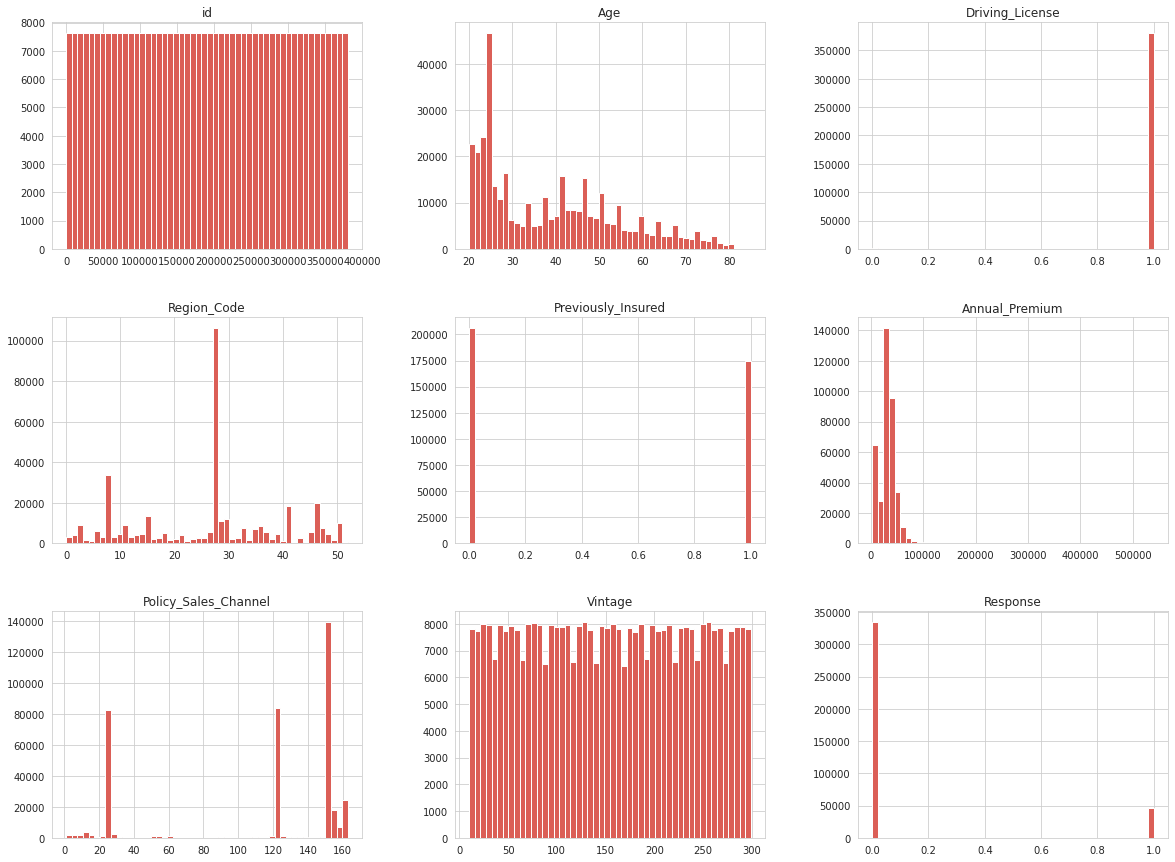

In [56]:
# make a copy of the initial dataset
train = train_data.copy()

# set a common style for the plots
sns.set_style("whitegrid")
sns.set_palette("hls",8)

# display the histogram chart for each feature
train.hist(bins=50, figsize=(20,15))
plt.show()

Taking a look at the target feature's distribution and the ratio of customers giving positive or negative response:

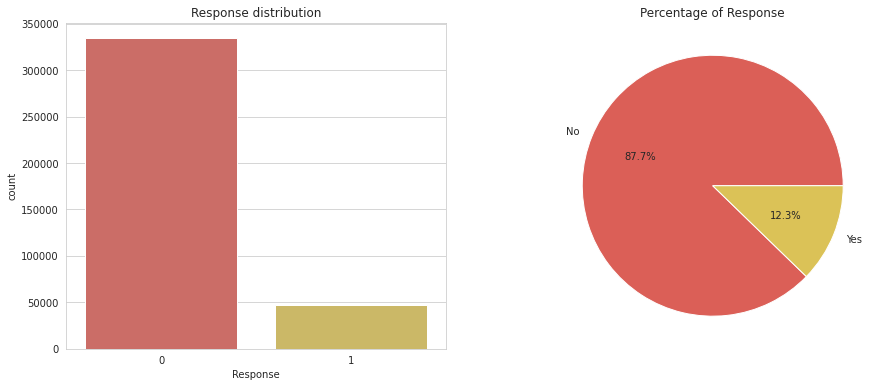

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x='Response', data=train,ax=ax1)
ax1.set_title('Response distribution')

ax2.pie(train['Response'].value_counts() ,autopct='%.1f%%', labels=['No', 'Yes'])
ax2.set_title('Percentage of Response')

plt.show()

> **Observations**:
* The responses of the customers to the vehicle insurance were predominantly negative, more than 87% answered with no.

The insurance company apparently needs a good strategy to convince more customers to have Vehicle insurance as well.

First, we study the features independently and their relationship with the target feature, Response, then by comparing it to other features.

## Categorical features

For the features which contain categories of values, we generate plots to visualize the partition of the data into distict categories. 
The category features are the following:
* Driving_License = {0, 1} (* show if the customer has a driving license *)
* Gender = {Male, Female}
* Vehicle_Age = {<1 year, 1-2 years, > 2 years}
* Vehicle_Damage = {No, Yes} (* shows whether or not the customer's car has been damaged before *)
* Previously_Insured = {0, 1} (* shows if the customer already had a car insurance before *)

* **Driving license**

First, we analyze the response of the customers relative to whether or not they own a driving license:

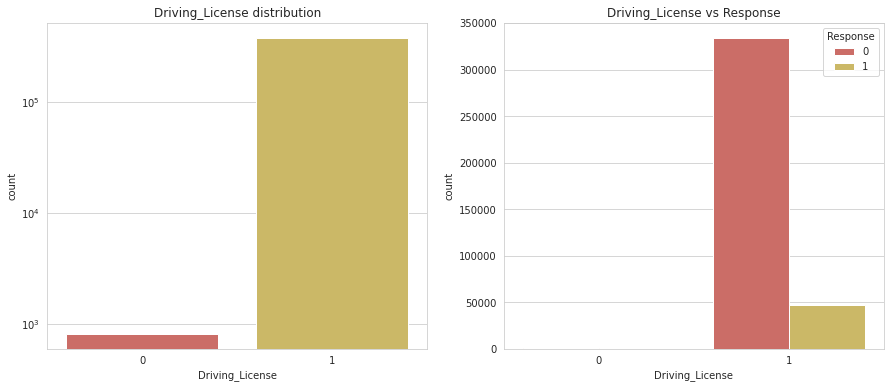

Nr of customers having a driving license:  380297
   vs Nr of customers having NO driving license:  812
Nr of positive responses customers having a driving license:  46669
Ratio of customers with a driving license responding positively: 0.1227 (12.27%) 


In [59]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Driving_License distribution')
g1 = sns.countplot(x=train.Driving_License, ax=ax1)
g1.set(yscale = "log")
ax2.set_title('Driving_License vs Response')
sns.countplot(x = 'Driving_License', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_drivers = len(train[train.Driving_License == 1])
nr_non_drivers = len(train[train.Driving_License == 0])
nr_positive_responses_drivers = len(train[(train.Driving_License == 1) & (train.Response == 1)])
ratio_of_positive_responses_drivers = nr_positive_responses_drivers/nr_drivers

print("Nr of customers having a driving license: " , nr_drivers)
print("   vs Nr of customers having NO driving license: " , nr_non_drivers)
print("Nr of positive responses customers having a driving license: " , nr_positive_responses_drivers)
print("Ratio of customers with a driving license responding positively: " + str(round(ratio_of_positive_responses_drivers,4)) + " (" + str(round(ratio_of_positive_responses_drivers * 100,2)) + "%) ")

> **Observations**:
* From the first plot, we can see that most of the customers have a driving license, which is as we would expect.
* What is more surprising, is the relatively small ratio of customers having a driving license, who responded positively to the possibilty of a car insurance, more precisely less than 13%. This would imply that having a driving license has little influence on the choice of the customer to pay for a car insurance.

* **Gender**

Next, we are curious to find out how the gender would affect the response of the customers:

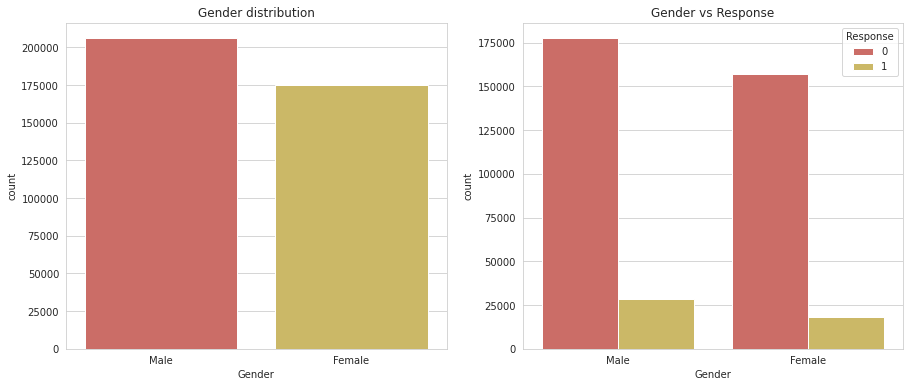

Nr of positive responses from male customers:  28525
Ratio of males responding positively: 0.1384 (13.84%) 
-------------------------------------------------------------------------------
Nr of positive responses from female customers:  18185
Ratio of females responding positively: 0.1039 (10.39%) 


In [60]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Gender distribution')
sns.countplot(x=train.Gender, ax=ax1)
ax2.set_title('Gender vs Response')
sns.countplot(x = 'Gender', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_male_customers = len(train[train.Gender == 'Male'])
nr_positive_responses_male = len(train[(train.Gender == 'Male') & (train.Response == 1)])
ratio_of_positive_responses_male = nr_positive_responses_male/nr_male_customers
print("Nr of positive responses from male customers: " , nr_positive_responses_male)
print("Ratio of males responding positively: " + str(round(ratio_of_positive_responses_male,4)) + " (" + str(round(ratio_of_positive_responses_male * 100,2)) + "%) ")
print("-------------------------------------------------------------------------------")

nr_female_customers = len(train[train.Gender == 'Female'])
nr_positive_responses_female = len(train[(train.Gender == 'Female') & (train.Response == 1)])
ratio_of_positive_responses_female = nr_positive_responses_female/nr_female_customers
print("Nr of positive responses from female customers: " , nr_positive_responses_female)
print("Ratio of females responding positively: " + str(round(ratio_of_positive_responses_female,4)) + " (" + str(round(ratio_of_positive_responses_female * 100,2)) + "%) ")

> **Observations**:
* As we can see, among the customers there is a fairly equal number of male and female, so the dataset is balanced from the point of view of the gender.
* Although for both genders, the number of responses is predomninantly negative, the Response of the customers related to the gender shows that the ratio of males responding positively is greater than the ratio of women. Therefore, it can be said that men are more interested in car insurance than women are.

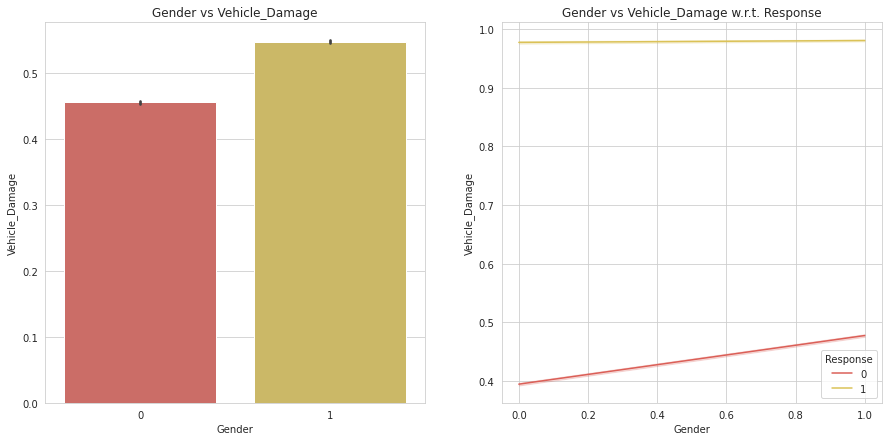

In [61]:
train_encoded = train.copy()
train_encoded['Gender'] = train_encoded['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
train_encoded['Vehicle_Damage'] = train_encoded['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,7))

sns.barplot(x='Gender', y='Vehicle_Damage',data=train_encoded,ax=ax1)
ax1.set_title('Gender vs Vehicle_Damage')
sns.lineplot(x='Gender', y='Vehicle_Damage',hue="Response",data=train_encoded,ax=ax2)
ax2.set_title('Gender vs Vehicle_Damage w.r.t. Response')

plt.show()

**Observations**:

*Gender vs Vehicle_Damage*: (positive correlation)

> The two plots show that:
* male customers had more damage to their vehicles than female customers;
* male customers with more damage to their cars responded more negatively to the insurance offer than female customers. However, the number of positive responses is similar independent of the gender.

Gender should be taken into consideration as well, because it positively influences Vehicle_Damage which has a strong positive correlation with Response.

* **Age of the vehicle**

Before analyzing the data related to the age of the vehicles, our initial intuition would be that as the age of the car increases, the interest of the customers for a car insurance also rises. This is due to the fact that older cars need more maintainance than newer models, for example, some parts get worn out or break down and need some replacement.

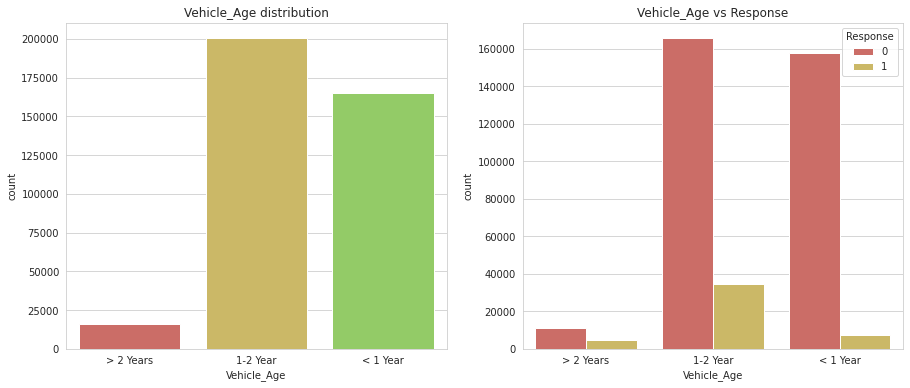

Nr of customers with vehicles of age < 1 Year:  164786
Nr of positive responses from customers with vehicles of age < 1 Year:  7202
Ratio of customers with cars < 1 Year of age responding positively: 0.0437 (4.37%) 
----------------------------------------------------------------------------------------
Nr of customers with vehicles of age 1-2 Year:  200316
Nr of positive responses from customers with vehicles of age 1-2 Year:  34806
Ratio of customers with cars 1-2 Year of age responding positively: 0.1738 (17.38%) 
----------------------------------------------------------------------------------------
Nr of customers with vehicles of age > 2 Years:  16007
Nr of positive responses from customers with vehicles of age > 2 Year:  4702
Ratio of customers with cars > 2 Years of age responding positively: 0.2937 (29.37%) 
----------------------------------------------------------------------------------------


In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Vehicle_Age distribution')
sns.countplot(x=train.Vehicle_Age, ax=ax1)
ax2.set_title('Vehicle_Age vs Response')
sns.countplot(x = 'Vehicle_Age', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_new_vehicles = len(train[train.Vehicle_Age == '< 1 Year'])
nr_positive_responses_new_vehicles = len(train[(train.Vehicle_Age == '< 1 Year') & (train.Response == 1)])
ratio_of_positive_responses_new_vehicles = nr_positive_responses_new_vehicles/nr_new_vehicles

print("Nr of customers with vehicles of age < 1 Year: ", nr_new_vehicles)
print("Nr of positive responses from customers with vehicles of age < 1 Year: " , nr_positive_responses_new_vehicles)
print("Ratio of customers with cars < 1 Year of age responding positively: " + str(round(ratio_of_positive_responses_new_vehicles,4))  + " (" + str(round(ratio_of_positive_responses_new_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")

nr_young_vehicles = len(train[train.Vehicle_Age == '1-2 Year'])
nr_positive_responses_nr_young_vehicles = len(train[(train.Vehicle_Age == '1-2 Year') & (train.Response == 1)])
ratio_of_positive_responses_young_vehicles = nr_positive_responses_nr_young_vehicles/nr_young_vehicles
print("Nr of customers with vehicles of age 1-2 Year: ", nr_young_vehicles)
print("Nr of positive responses from customers with vehicles of age 1-2 Year: " , nr_positive_responses_nr_young_vehicles)
print("Ratio of customers with cars 1-2 Year of age responding positively: " + str(round(ratio_of_positive_responses_young_vehicles,4)) + " (" + str(round(ratio_of_positive_responses_young_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")

nr_old_vehicles = len(train[train.Vehicle_Age == '> 2 Years'])
nr_positive_responses_old_vehicles = len(train[(train.Vehicle_Age == '> 2 Years') & (train.Response == 1)])
print("Nr of customers with vehicles of age > 2 Years: ", nr_old_vehicles)
print("Nr of positive responses from customers with vehicles of age > 2 Year: " , nr_positive_responses_old_vehicles)
ratio_positive_responses_old_vehicles = nr_positive_responses_old_vehicles/nr_old_vehicles
print("Ratio of customers with cars > 2 Years of age responding positively: " + str(round(ratio_positive_responses_old_vehicles,4)) + " (" + str(round(ratio_positive_responses_old_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")


> **Observations**:
* Most of the customers had relatively new cars with ages between 1-2 years.
* Among the customers with new cars, with age less than 1 year, only a very small ratio, less than 5%, was interested in car insurance. Which is understandable as new cars are not supposed to break down very easily or need their parts replaced, however they are just as much at risk of being damaged in an accident or by some natural hazard, such as hail.
* As the age of the car increases, the ratio of customers opting for a car insurance also increases, as it is shown in the case of the cars with age greater than 2 years. Although, the nr of older cars (age > 2 Years) is more than 10% smaller than the nr of new cars (age < 1 Year), the ratio of customers interested in a car insurance is almost 30%.
* This clearly indicates that the customers having older cars are more interested in having an insurance for their cars.

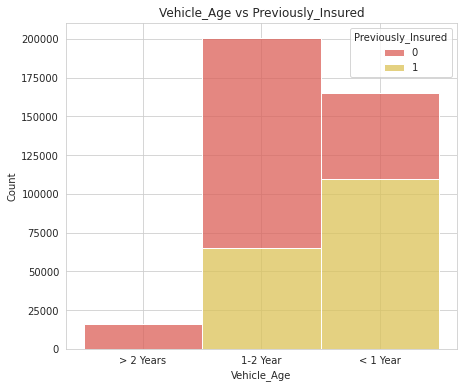

In [63]:
plt.figure(figsize=(7,6))

sns.histplot(binwidth=0.5, hue="Previously_Insured", 
                 x="Vehicle_Age", data=train, 
                 stat="count", multiple="stack")
plt.title("Vehicle_Age vs Previously_Insured")
plt.show()

> **Observations**:
* *Vehicle_Age vs Previously_Insured*: Customers having new vehicles, of age less than 1 year, are more likely to have had an insurance previously, while customer with older vehicles are less likely to have been insured before.

* **Vehicle damage**

We would expect that people who once had their cars damaged would be more interested in a car insurance, in case the same would happen to them in the future.

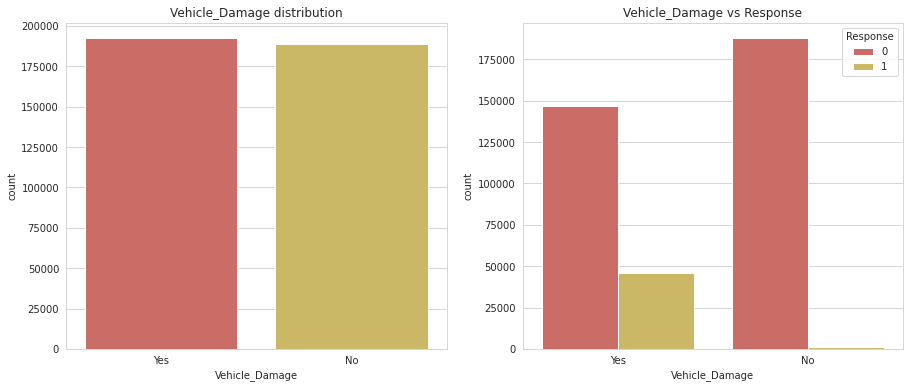

Nr of customers having their vehicles previously damaged:  192413
   vs Nr of customers having no previous damage to their vehicles:  188696
Nr of POSITIVE responses of customers having their vehicles previously damaged:  45728
   vs Nr of NEGATIVE responses of customers having their vehicles previously damaged:  146685
Ratio of customers, having their vehicles previously damaged, who responded positively: 0.2377 (23.77%) 


In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Vehicle_Damage distribution')
sns.countplot(x=train.Vehicle_Damage, ax=ax1)
ax2.set_title('Vehicle_Damage vs Response')
sns.countplot(x = 'Vehicle_Damage', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_damaged_vehicles = len(train[train.Vehicle_Damage == 'Yes'])
nr_not_damaged_vehicles = len(train[train.Vehicle_Damage == 'No'])
nr_positive_responses_damaged_vehicles = len(train[(train.Vehicle_Damage == 'Yes') & (train.Response == 1)])
nr_negative_responses_damaged_vehicles = len(train[(train.Vehicle_Damage == 'Yes') & (train.Response == 0)])
ratio_of_positive_responses_damaged_vehicles = nr_positive_responses_damaged_vehicles/nr_damaged_vehicles

print("Nr of customers having their vehicles previously damaged: ", nr_damaged_vehicles)
print("   vs Nr of customers having no previous damage to their vehicles: ", nr_not_damaged_vehicles)
print("Nr of POSITIVE responses of customers having their vehicles previously damaged: ", nr_positive_responses_damaged_vehicles)
print("   vs Nr of NEGATIVE responses of customers having their vehicles previously damaged: ", nr_negative_responses_damaged_vehicles)
print("Ratio of customers, having their vehicles previously damaged, who responded positively: "+ str(round(ratio_of_positive_responses_damaged_vehicles,4)) + " ("+ str(round(ratio_of_positive_responses_damaged_vehicles * 100,2)) + "%) ")

> **Observations**:
* As the figures show, among the customers, around half of them had their cars previously damaged.
* From the ones who already had some damage to their cars in the past, more than 23% have responded affirmatively to the option of having a car insurance, which shows:
  * First, that customers who already know the expenses of repairing a damaged car, are appreciating more the possibility of an insurance on their vehicles, to prevent future costs.
  * Second, that previous damage to the vehicle has more influence on the response of the customers than having a driving license.
* Another remark, is that on the second plot it seems that customers who had no previous damage to their cars all responded negatively to the offer of a car insurance, however after a closer look to the numbers, we can see that there are still a few people who would like to have an insurance on their cars even though they haven't suffered damage before.

In [65]:
nr_positive_responses_not_damaged_vehicles = len(train[(train.Vehicle_Damage == 'No') & (train.Response == 1)])
nr_negative_responses_not_damaged_vehicles = len(train[(train.Vehicle_Damage == 'No') & (train.Response == 0)])
print("Nr of POSITIVE responses of customers having no previous damage to their vehicles: ", nr_positive_responses_not_damaged_vehicles)
print("Nr of NEGATIVE responses of customers having no previous damage to their vehicles: ", nr_negative_responses_not_damaged_vehicles)

Nr of POSITIVE responses of customers having no previous damage to their vehicles:  982
Nr of NEGATIVE responses of customers having no previous damage to their vehicles:  187714


This means that the scale of the nr of customers with previous vehicle damage and the nr of customers with positive response doesn't match. This can be corrected however, by using a logarithmic scale for the nr of responses.

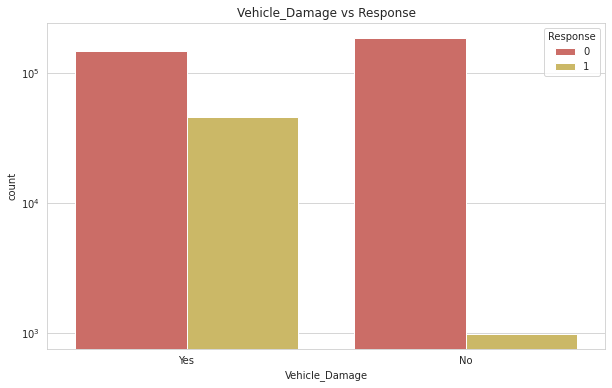

In [66]:
plt.figure(figsize=(10,6))
plt.title('Vehicle_Damage vs Response')
g = sns.countplot(x = 'Vehicle_Damage', hue = 'Response', data = train)
g.set(yscale="log")
plt.show()

##### _Vehicle_Damage vs other features_

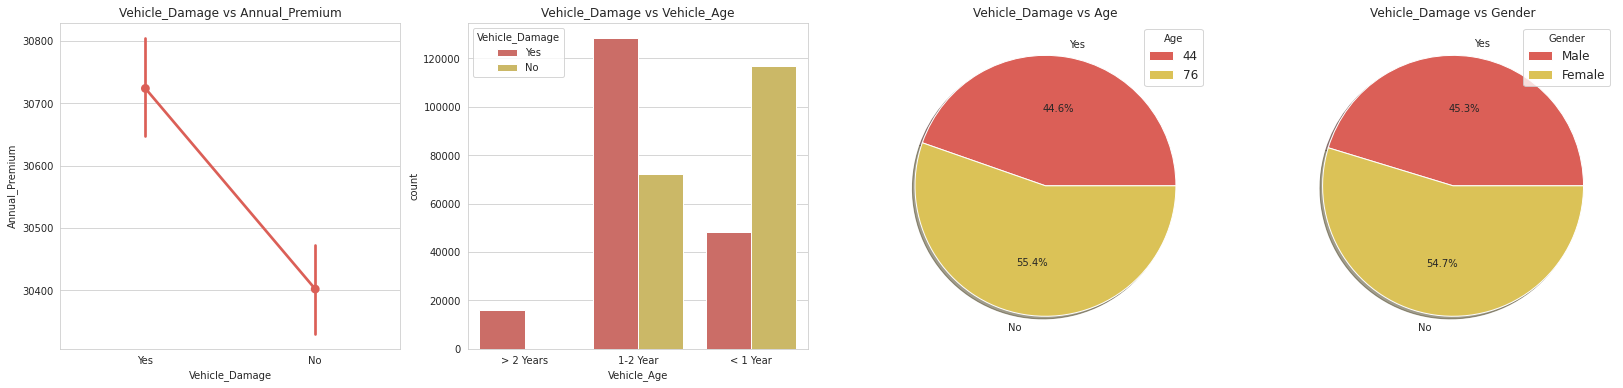

In [67]:
fig, axes = plt.subplots(1,4, figsize=(28,6))

sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium', data = train,ax=axes[0])
axes[0].set_title('Vehicle_Damage vs Annual_Premium')

# transform Vehicle_Age to numerical value to be able to represent it
vehicle_age_encoded = train.copy()
vehicle_age_encoded['Vehicle_Age'] = vehicle_age_encoded['Vehicle_Age'].apply(lambda x: 0 if x == "< 1 Year" else 1 if x == "1-2 Year" else 2)

sns.countplot(hue = 'Vehicle_Damage', x = 'Vehicle_Age', data = train,ax=axes[1])
axes[1].set_title('Vehicle_Damage vs Vehicle_Age')

axes[2].pie( x= train.groupby('Vehicle_Damage')['Age'].mean(), 
            labels=train['Vehicle_Damage'].unique(), autopct='%1.1f%%', 
            shadow=True)
axes[2].set_title('Vehicle_Damage vs Age')
axes[2].legend(labels=train['Age'].unique(), title = "Age", 
           fontsize = 'large', title_fontsize = "10")

# transform gender to numerical value to be able to represent it
gender_encoded = train.copy()
gender_encoded['Gender'] = gender_encoded['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

axes[3].pie( x= gender_encoded.groupby('Vehicle_Damage')['Gender'].sum(), 
            labels=gender_encoded['Vehicle_Damage'].unique(), autopct='%1.1f%%', 
            shadow=True)
axes[3].set_title('Vehicle_Damage vs Gender')
axes[3].legend(labels=train['Gender'].unique(), title = "Gender", 
           fontsize = 'large', title_fontsize = "10")

plt.show()

> **Observations**:
* _Vehicle_Damage vs Annual_Premium_: Those who had damaged vehicles before have to pay a higher amount for Annual Premium.
* _Vehicle_Damage vs Vehicle_Age_: Newer cars, with age < 1 Year, were less likely to have damage to them, while the cars with ages 1-2 Years were the most likely to have had some damage to them before.
* _Vehicle_Damage vs Age_: Older Customers were more likely to have had damaged cars before than younger customers.
* _Vehicle_Damage vs Gender_: More female customers had damage to their cars before than male customers.

* **Previous insurance**



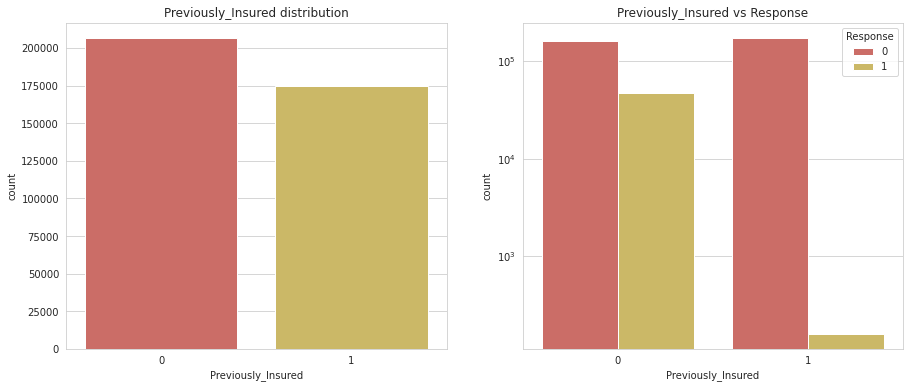

Nr of customers having previously insured:  174628
   vs Nr of customers having NO previous insurance:  206481
Nr of positive responses from customers having previously insured:  158
   vs Nr of positive responses from customers having NO previous insurance:  46552
Ratio of customers having previously insured and responding positively: 0.0009 (0.09%) 


In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Previously_Insured distribution')
sns.countplot(x=train.Previously_Insured, ax=ax1)
ax2.set_title('Previously_Insured vs Response')
g = sns.countplot(x = 'Previously_Insured', hue = 'Response', data = train,ax=ax2)
g.set(yscale="log")
plt.show()

nr_prev_insured = len(train[train.Previously_Insured == 1])
nr_not_prev_insured = len(train[train.Previously_Insured == 0])
nr_positive_responses_prev_insured = len(train[(train.Previously_Insured == 1) & (train.Response == 1)])
nr_positive_responses_not_prev_insured = len(train[(train.Previously_Insured == 0) & (train.Response == 1)])
ratio_of_positive_responses_prev_insured = nr_positive_responses_prev_insured/nr_prev_insured

print("Nr of customers having previously insured: " , nr_prev_insured)
print("   vs Nr of customers having NO previous insurance: ", nr_not_prev_insured)
print("Nr of positive responses from customers having previously insured: " , nr_positive_responses_prev_insured)
print("   vs Nr of positive responses from customers having NO previous insurance: " , nr_positive_responses_not_prev_insured)
print("Ratio of customers having previously insured and responding positively: " + str(round(ratio_of_positive_responses_prev_insured,4)) + " (" + str(round(ratio_of_positive_responses_prev_insured * 100,2)) + "%) ")

> **Observations**:
* As we can see, around half of the customers have had a car insurance before, but only 9 out of 10000 of them would like to have an insurance on their vehicles in the future as well. On the other side, from the customers who did not have a car insurance previously, half of them responded positively.
* This means, that having had a car insurance previously doesn't increase the number of positive responses directly, however it could have a larger impact on the Responses of the customers if analyzed in combination with the Vehicle_Damage or the Vehicle_Age features.

##### _Previously_Insured vs other features_

We would expect that, customers having had a car insurance previously would like to extend their insurance contract if they have a very old car or if they have had some damage to their vehicles, in which cases an insurance would seem very advantageous to them. 

Therefore, aside from analyizing the data of having a previous insurance relative to the positive response of the customers, it would also seem interesting to compare it against the age of the vehicle and the previous damage, to see if these combined would increase the number of positive responses or not.

Previously_Insured vs Vehicle_Damage


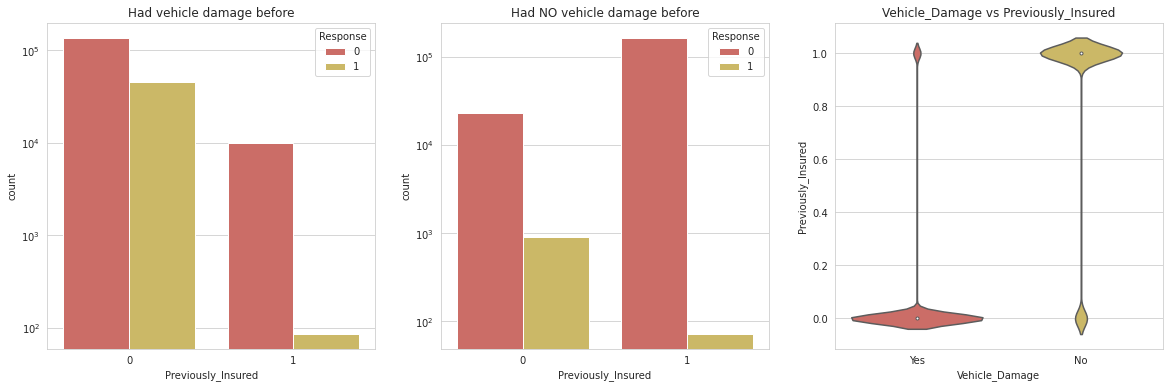

In [69]:
vehicle_damage = train[train.Vehicle_Damage == 'Yes']
no_vehicle_damage = train[train.Vehicle_Damage == 'No']

print("Previously_Insured vs Vehicle_Damage")

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6))

g1 = sns.countplot(x = 'Previously_Insured', hue = 'Response', data=vehicle_damage, ax = ax1)
g1.set(yscale="log")
ax1.set_title('Had vehicle damage before')

g2 = sns.countplot(x = 'Previously_Insured', hue = 'Response', data=no_vehicle_damage, ax = ax2)
g2.set(yscale="log")
ax2.set_title('Had NO vehicle damage before')

sns.violinplot(y='Previously_Insured', x='Vehicle_Damage',data=train,ax=ax3)
ax3.set_title('Vehicle_Damage vs Previously_Insured')

plt.show()

> **Observations**:
* From the first 2 plots, we can see that those who had NOT been previously insured but had suffered damage to their vehicles are more interested in a car insurance, than those who also have NOT been previously insured but had no damage to their cars yet, which is a reasonable outcome.
* *Previously_Insured vs Vehicle_Damage*: Those who have not been previously insured and had their cars damaged in the past, would be more interested in a car insurance than those, who had an insurance before but their car was not damaged. 

Next, we analyze the Previously_Insured w.r.t. Vehicle_Age:

Previously_Insured vs Vehicle_Age


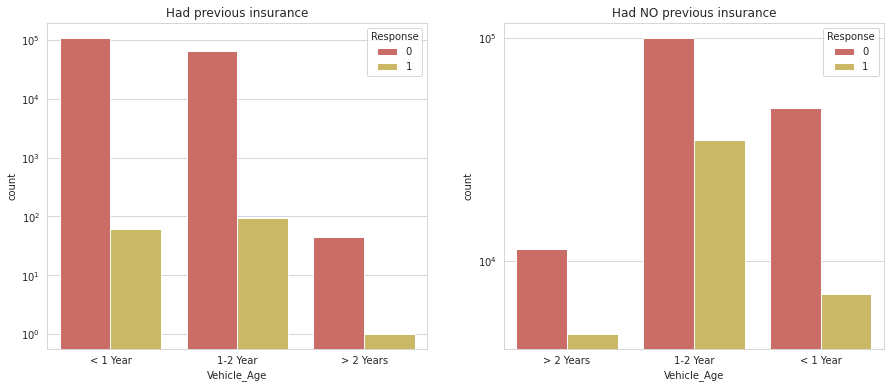

In [70]:
prev_insurance = train[train.Previously_Insured == 1]
no_prev_insurance = train[train.Previously_Insured == 0]

print("Previously_Insured vs Vehicle_Age")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Had previous insurance')
g1 = sns.countplot(x = 'Vehicle_Age', hue = 'Response', data=prev_insurance, ax = ax1)
g1.set(yscale="log")
ax2.set_title('Had NO previous insurance')
g2 = sns.countplot(x = 'Vehicle_Age', hue = 'Response', data=no_prev_insurance, ax = ax2)
g2.set(yscale="log")
plt.show()

> **Observations**:
* From the plots, we can conclude that among the customers with vehicles of ages between 1-2 years, those who had no previous insurance were more interested in having an insurance in the future, than those who already owned one. 
* Interesting to note that the customers owning newer cars, of less than 1 year, or older ones, of more than 2 years, were much less likely to have an insurance in the future, regardless of whether they had one before or not.

## Numerical features

Next, for the features containing numerical values we generate distribution plots to analyze the influence of these values on the final response of the customers.

Numerical feautures are:
* Age: between 20 to 85 years
* Annual_Premium: how much the customer has to pay for insurance in a year, ranges between 2630.0	to max 540165.0
* Vintage: how long the customer has been associated with the insurance company, ranges between 10 to 299 days
* Policy_Sales_Channel: 163 distinct channels, encoded anonyomously, which represent the communication channel on which the customer can be reached, for ex. phone, mail, webpage announcement, etc.
* Region_Code: between 0 to 52, which represent the encoding of the region where the customer lives

#### **Age**

First, we look at how the age influences the choice of the customer of opting for a car insurance:

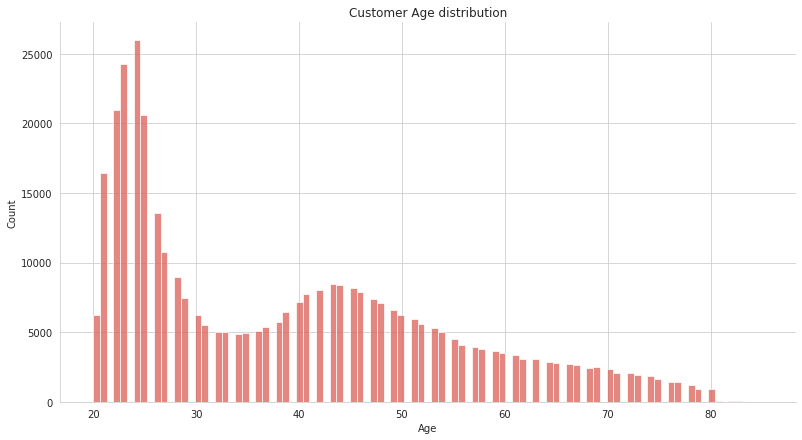

In [71]:
sns.displot(x = 'Age', data = train, height = 6, aspect=15/8)
plt.title('Customer Age distribution')
plt.show()

As we can see the ages are quite varying, but there are some clusters around specific ranges, therefore we can distinguish 3 age groups:
* young: 20-30
* middle-aged: 30-50
* old: 50-80

Interesting to note that most of the customers are young, with ages between 20-30 years, or middle aged, between 30-50 years, representing the working class.

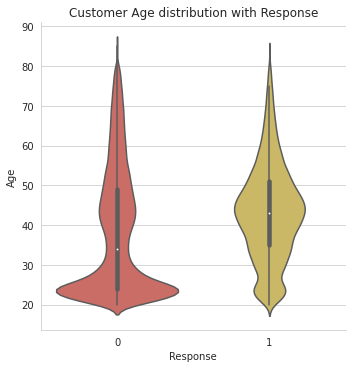

In [72]:
sns.catplot(x="Response", y='Age', data=train, kind="violin")
plt.title("Customer Age distribution with Response")
plt.show()

In [73]:
 # categorize the 'Age' feature
train['Age_Group'] = train['Age'].apply(lambda x:'Young' if x<30 else 'MiddleAged' if x<50 else 'Old')

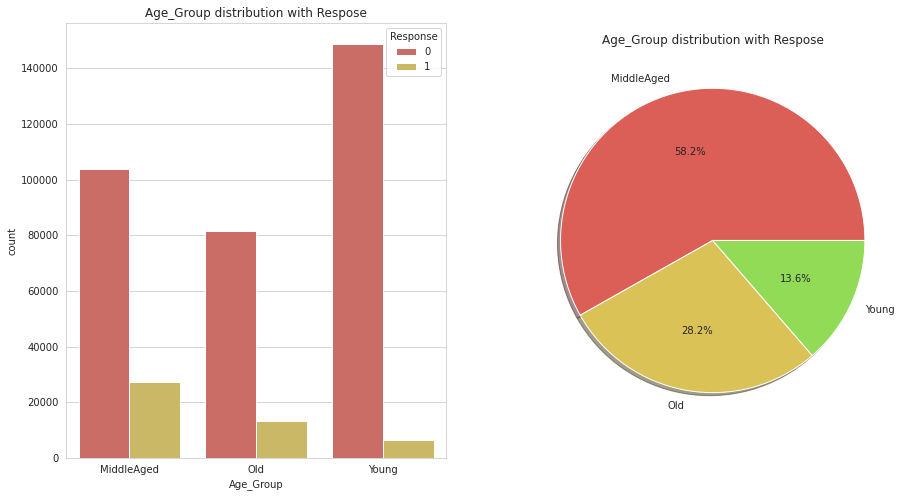

In [74]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x = 'Age_Group', data = train, hue='Response',ax=ax1)
ax1.set_title("Age_Group distribution with Respose")

ax2.pie( x= train.groupby('Age_Group')['Response'].sum(), 
            labels=train['Age_Group'].unique(), autopct='%1.1f%%', 
            shadow=True)
ax2.set_title("Age_Group distribution with Respose")

plt.show()

> Looking at the above plot and analyzing the Responses relative to the ages of the customers we find out that *Middle-Aged* customers with ages between 30-50 years, and *Older* customers above the age of 50, had the majority of positive responses, which means they were more interested in having a car insurance, than *Young* customers with ages between 20-30.

In [75]:
nr_young = len(train[train.Age_Group == 'Young'])
nr_positive_responses_young = len(train[(train.Age_Group == 'Young') & (train.Response == 1)])
ratio_of_positive_responses_young = nr_positive_responses_young/nr_young

print("Nr of young customers: " , nr_young)
print("Nr of positive responses from young customers: " , nr_positive_responses_young)
print("Ratio of positive responses from young customers: " ,  str(round(ratio_of_positive_responses_young,4)) + " (" + str(round(ratio_of_positive_responses_young * 100,2)) + "%) ")
print("--------------------------------------------------------------------------------------------------------")

nr_middle_aged = len(train[train.Age_Group == 'MiddleAged'])
nr_positive_responses_middle_aged = len(train[(train.Age_Group == 'MiddleAged') & (train.Response == 1)])
ratio_of_positive_responses_middle_aged = nr_positive_responses_middle_aged/nr_middle_aged

print("Nr of middleAged customers: " , nr_middle_aged)
print("Nr of positive responses from middleAged customers: " , nr_positive_responses_middle_aged)
print("Ratio of positive responses from middleAged customers: " ,  str(round(ratio_of_positive_responses_middle_aged,4)) + " (" + str(round(ratio_of_positive_responses_middle_aged * 100,2)) + "%) ")
print("--------------------------------------------------------------------------------------------------------")

nr_old = len(train[train.Age_Group == 'Old'])
nr_positive_responses_old = len(train[(train.Age_Group == 'Old') & (train.Response == 1)])
ratio_of_positive_responses_old = nr_positive_responses_old/nr_old

print("Nr of old customers: " , nr_old)
print("Nr of positive responses from old customers: " , nr_positive_responses_old)
print("Ratio of positive responses from old customers: " ,  str(round(ratio_of_positive_responses_old,4)) + " (" + str(round(ratio_of_positive_responses_old * 100,2)) + "%) ")
print("--------------------------------------------------------------------------------------------------------")

Nr of young customers:  155203
Nr of positive responses from young customers:  6374
Ratio of positive responses from young customers:  0.0411 (4.11%) 
--------------------------------------------------------------------------------------------------------
Nr of middleAged customers:  131099
Nr of positive responses from middleAged customers:  27175
Ratio of positive responses from middleAged customers:  0.2073 (20.73%) 
--------------------------------------------------------------------------------------------------------
Nr of old customers:  94807
Nr of positive responses from old customers:  13161
Ratio of positive responses from old customers:  0.1388 (13.88%) 
--------------------------------------------------------------------------------------------------------


> Comparing the ratio of positive and negative responses per age category, our the calculations show, that 4% of the younger customers wanted a car insurance, 20% of the middle aged ones, and 13% of the retired customers. From here, we can conclude that the insurance in the vehicle is more popular among the middle-aged and older generations, and young customers had the most negative answers.

This tells us, that age indeed, represents an important factor in determining whether or not a customer would be interested in a car insurance.

##### _Age vs other features_

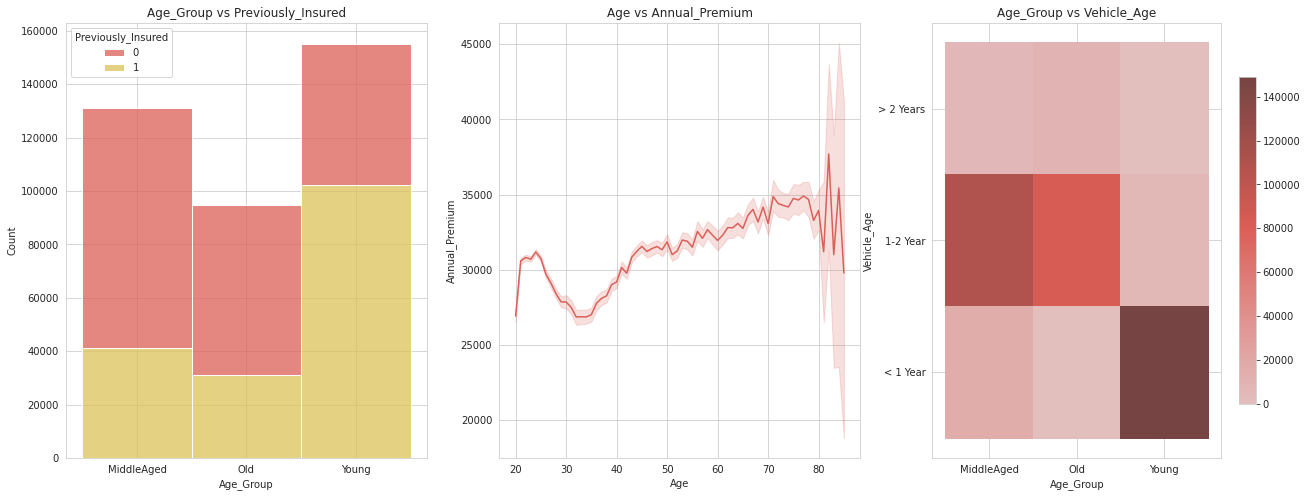

In [80]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(22,8))

sns.histplot(binwidth=0.5, x="Age_Group", hue="Previously_Insured", stat="count", multiple="stack", data=train,ax=ax1)
ax1.set_title("Age_Group vs Previously_Insured")

sns.lineplot(x="Age",y="Annual_Premium",data=train, ax = ax2)
ax2.set_title("Age vs Annual_Premium")

sns.histplot(x="Age_Group",y="Vehicle_Age",data=train,  cbar=True, cbar_kws=dict(shrink=.75), ax = ax3)
ax3.set_title("Age_Group vs Vehicle_Age")

plt.show()

**Observations**:
* *Age_Group vs Previously_Insured*:Younger customers were more likely to have had a previous insurance, while MiddleAged and Old customers had not.
* *Age vs Annual_Premium*: Younger customer with ages between 20-30, are more likely to pay a larger sum for insurance, as well as those with ages 50-80. The customers with ages between 30-40 are paying the least amount for annual premium.
* *Age_Group vs Vehicle_Age*:  Younger customers had newer cars, with age < 1 year, MiddleAged customers had mainly cars of 1-2 years and Old customers had rather older cars than 2 years. This shows that older generations were more likely to own also older vehicles.

#### **Annual premium**

The annual premium paid for insurance should be measured against the income of a person, but in this case we do not have data about how much the customers earn. 

As an initial guess, we would assume that those who already pay very much for an insurance would be less interested in having a car insurance, than those who pay a reasonable amount.

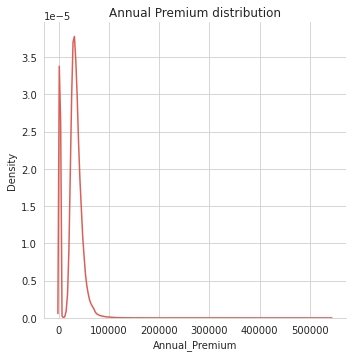

In [81]:
sns.displot(train.Annual_Premium, kind="kde", common_norm=False)
plt.title('Annual Premium distribution')
plt.show()

From the above plot, we can see that there are some values which lie very much outside the common range of values, which distort the plot as well, the figure appearing strongly right-skewed.

In [82]:
UpperLimit = 2.5 * train['Annual_Premium'].quantile(0.75) - 1.5 * train['Annual_Premium'].quantile(0.25)
# remove outlier values based on the previously computed UpperLimit
train['Annual_Premium_Treated'] = np.where(train['Annual_Premium']>UpperLimit, UpperLimit, train['Annual_Premium'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


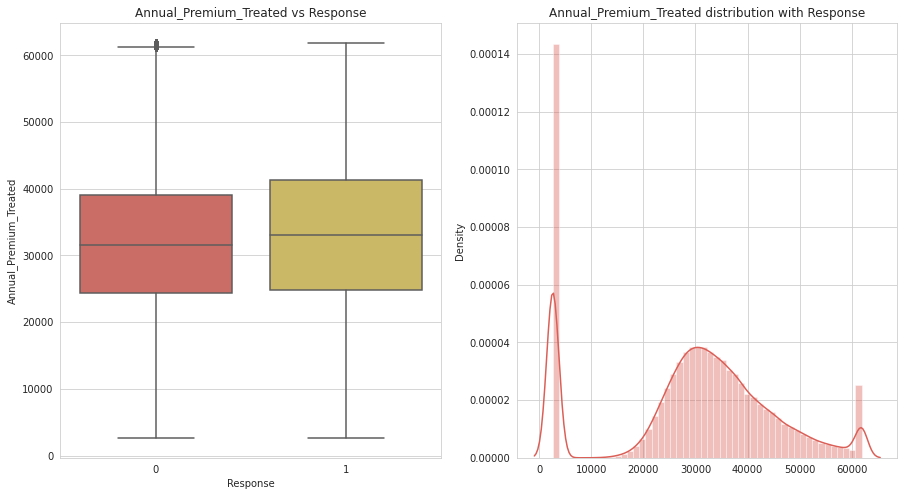

In [83]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(ax = ax1, y = 'Annual_Premium_Treated',x = 'Response', data = train)
ax1.set_title("Annual_Premium_Treated vs Response")

sns.distplot(ax = ax2, x = train['Annual_Premium_Treated'])
ax2.set_title("Annual_Premium_Treated distribution with Response")

plt.show()

> After removing the outlier values and rescaling the range of values, we observe form the plots that most of the people pay around the same amount of Annual Premium, and the responses were also balanced for those who pay a fairly similar amount for Annual Premium, therefore, it doesn't influence the customer's response as much as one would expect.

##### *Annual_Premium_Treated vs other features*

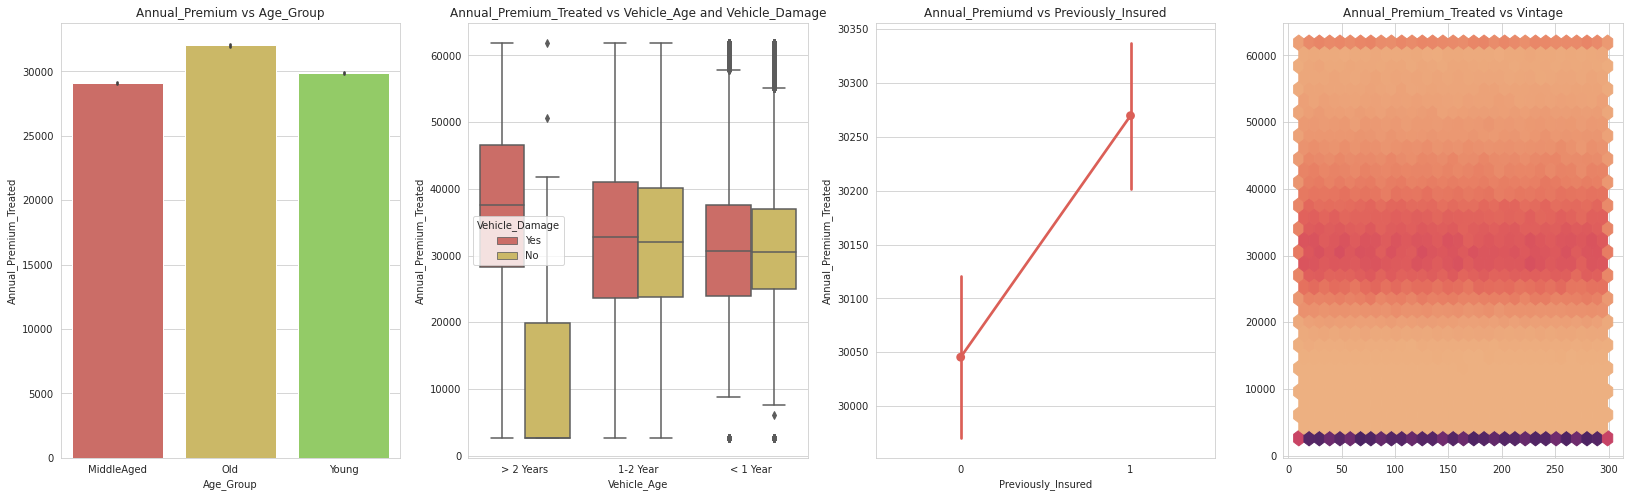

In [84]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(28,8))

sns.barplot(x = 'Age_Group',y = 'Annual_Premium_Treated', data= train, ax=ax1)
ax1.set_title("Annual_Premium vs Age_Group")

sns.boxplot( x = 'Vehicle_Age', y = 'Annual_Premium_Treated', hue = 'Vehicle_Damage', data=train ,ax=ax2)
ax2.set_title("Annual_Premium_Treated vs Vehicle_Age and Vehicle_Damage")

sns.pointplot(x="Previously_Insured",y="Annual_Premium_Treated",data=train, ax = ax3)
ax3.set_title("Annual_Premiumd vs Previously_Insured")

ax4.hexbin(x="Vintage", y="Annual_Premium_Treated", data=train, gridsize = 30, cmap='flare')
ax4.set_title("Annual_Premium_Treated vs Vintage")

plt.show()

> **Observations**:
* *Annual_Premium_Treated vs Age_Group*: it seems that _Old_ customers have to pay the most for annual premium, and _MiddleAged_ customers pay less.
* *Annual_Premium_Treated vs Vehicle_Age and Vehicle_Damage*: Customers with cars older than 2 years with no previous damage pay the smallest amount of annual premium, while those who have older cars which have been damaged before, pay the largest amount. Customers with newer cars pay roughly the same amount for Annual premium, independent of whether the car has been damaged before or not.
* *Annual_Premium_Treated vs Previously_Insured*: it seems that customers who have been previously insured have to pay more for Annual premium than those who have not been insured before.
* *Annual_Premium_Treated vs Vintage*: The majority of the customers pay the same amount of money for annual insurance, an average value, independent of their vintage.

#### **Vintage**

As it shows in the plot below, the Vintage value is equally dispersed among the customers, meaning that there are customers who joined the company only recently, or those who have been associated with the insurance company from longer ago. No customer has been associated with the company for more than a year, which means all of them are relatively new customers.

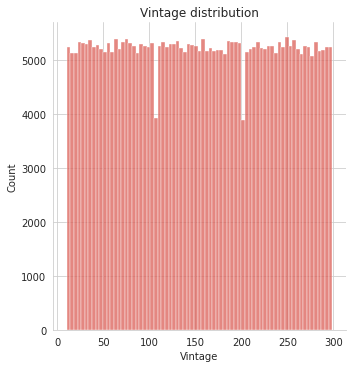

In [85]:
sns.displot(x = train['Vintage'])
plt.title("Vintage distribution")
plt.show()

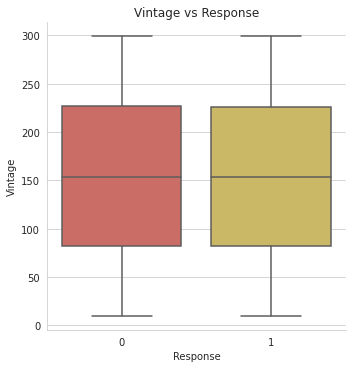

In [86]:
sns.catplot(y = 'Vintage',x = 'Response', data = train, kind="box")
plt.title("Vintage vs Response")
plt.show()

Analyzing the response of the customers relative to their vintage, we can see that the vintage value is between 100-230 for the majority of them, and their responses are divided equally. Therefore, the Vintage is not so relevant for the Response feature.

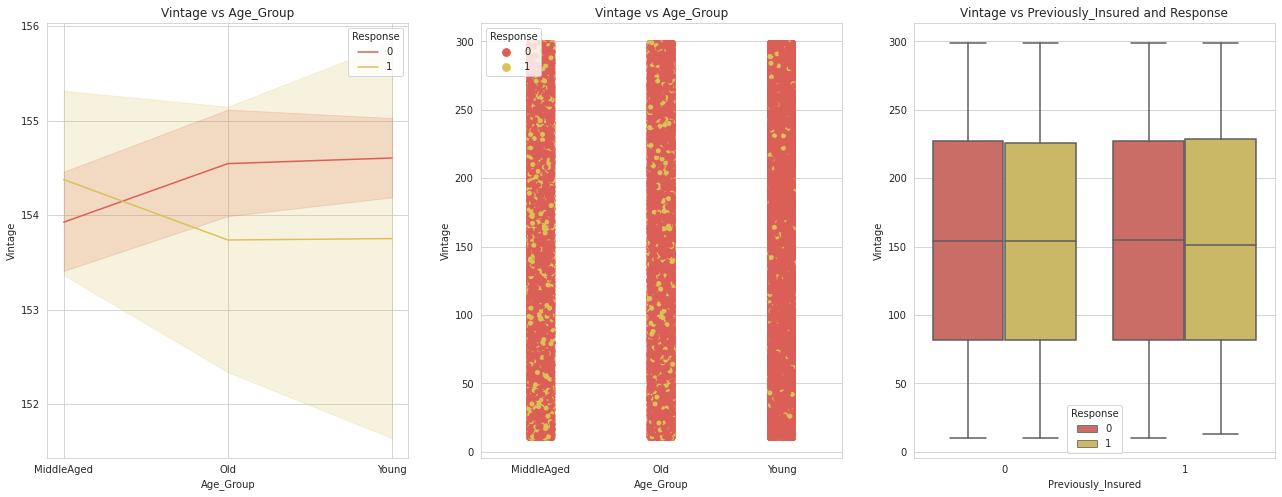

In [87]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(22,8))

sns.lineplot( x="Age_Group", y="Vintage", hue = 'Response', data=train,ax=ax1)
ax1.set_title("Vintage vs Age_Group")

sns.stripplot( x="Age_Group", y="Vintage", hue = 'Response', data=train,ax=ax2)
ax2.set_title("Vintage vs Age_Group")

sns.boxplot( x = 'Previously_Insured', y = 'Vintage', hue = 'Response', data=train ,ax=ax3)
ax3.set_title("Vintage vs Previously_Insured and Response")

plt.show()

> **Observations**:
*  *Vintage vs Age_Group*: MiddleAged customers who have been associated with the company for longer (have higher Vintage) also have the most positive responses, while Young customers who have been associated with the insurance company for longer had the most negative responses.
* *Vintage vs Previously_Insured*: The Vintage value of the customers doesn't affect the Previously_Insured and Response features, as we can see for both insured and not insured customers, the responses were equally distributed.

* **Region_Code**

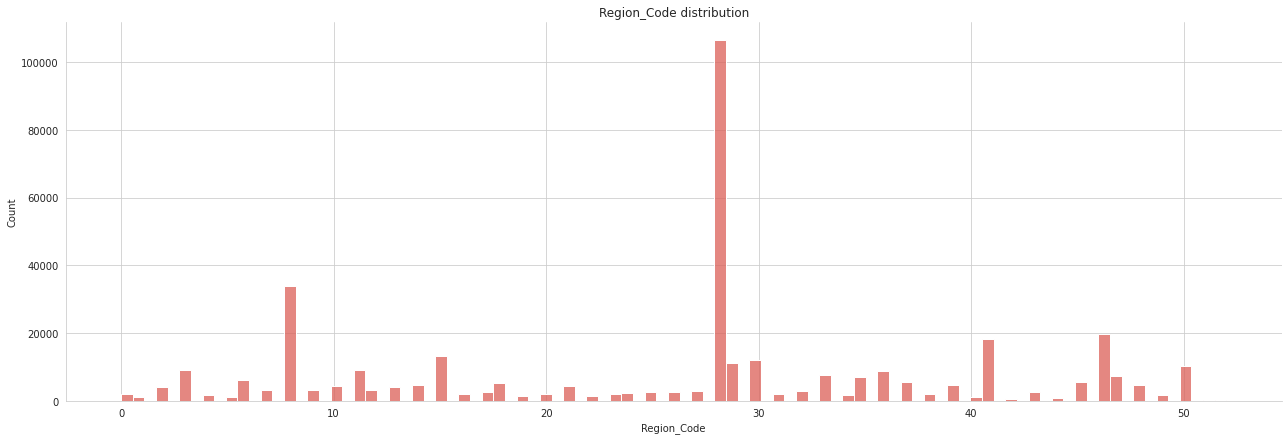

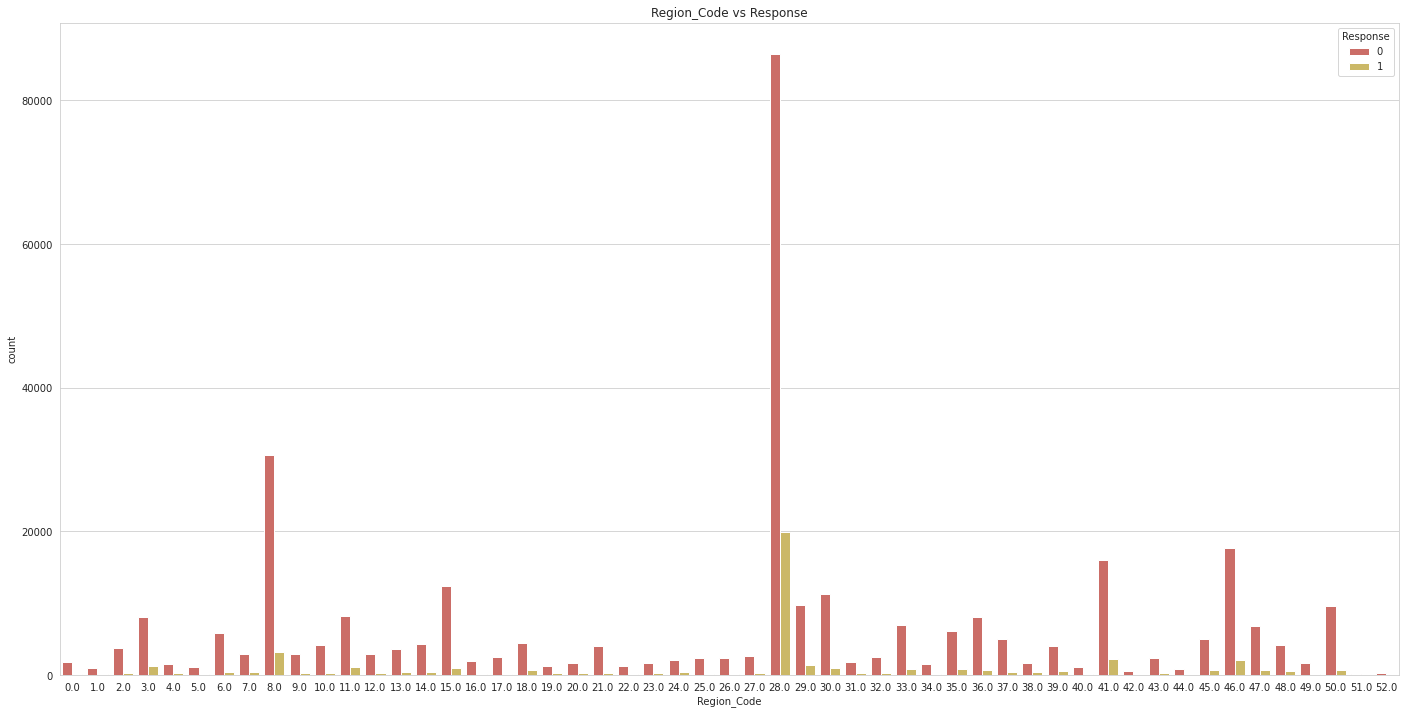

In [88]:
sns.displot(x = train['Region_Code'], height = 6, aspect=3)
plt.title("Region_Code distribution")
plt.show()

plt.figure(figsize=(24,12))
plt.title("Region_Code vs Response")
sns.countplot(x = "Region_Code" ,hue = "Response" , data = train )
plt.show()

In [89]:
positive_responses = len(train[(train["Region_Code"] == 28) & (train["Response"] == 1)])
all_responses = len(train[train["Region_Code"] == 28])
print(positive_responses/all_responses)

0.18716346379739698


> **Observations**:
* The highest number of positive responses came from customers from region 28, but also the most negative responses came from the same region.
* However, as for positive vs negative responses ratio, the leading region remains 28, with a ratio of 0.18 in favour of positive responses.

From the above plot, we can see that there appear to be region codes from of every value between the rage 0-52.

Therefore, we can distinguish 3 categories for the region codes:

* Region_A: representing those regions from where more than 100000 customers come
* Region_B: those regions belong here which have between 10000 and 35000 customers
* Region_C: regions with less than 10000 customers.

In [90]:
# Categorizing Region Code feature
x = train['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
category_map = dict(zip(x.keys(),x.values))
train['Region_Code_Group'] = train['Region_Code'].map(category_map)

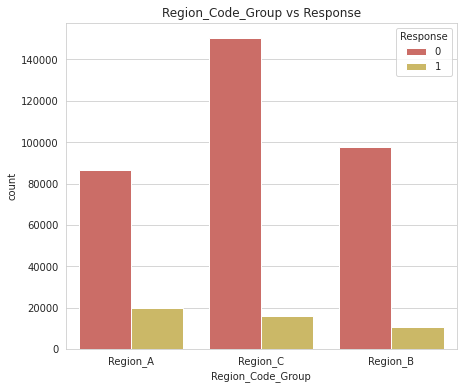

In [91]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'Region_Code_Group', data = train, hue='Response')
plt.title("Region_Code_Group vs Response")
plt.show()

> After projecting the response of the customers on the 3 new regions, we can see that most of the positive responses came from regions A and C, but most of the negative responses came also from region C.

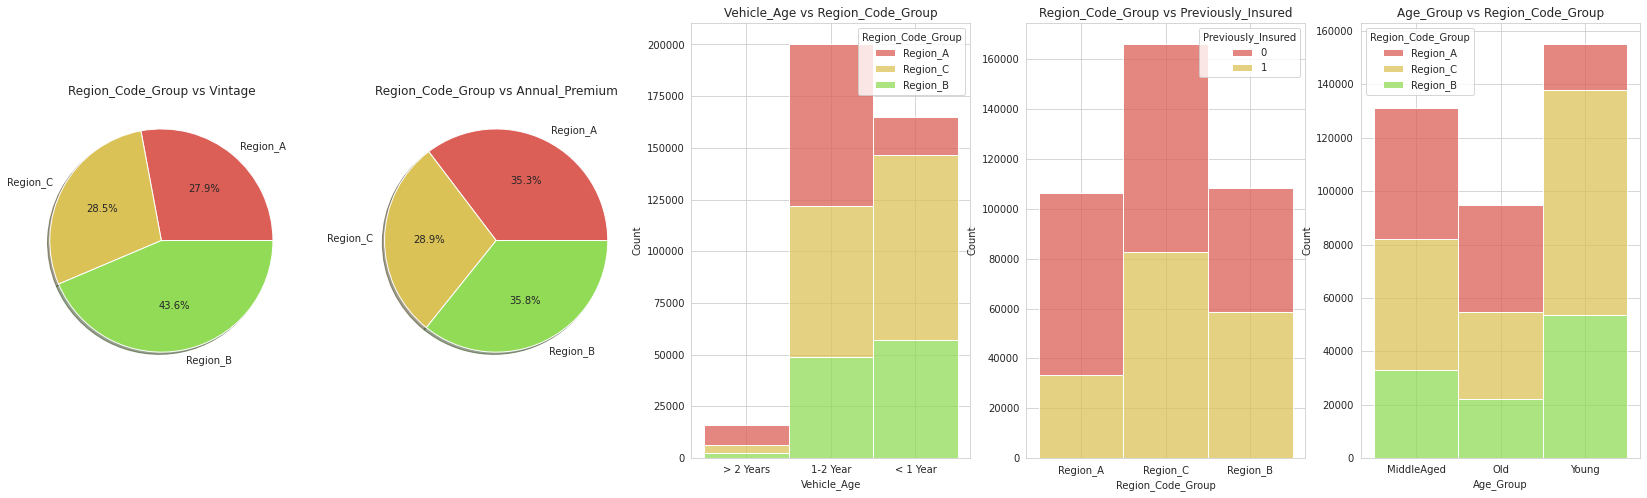

In [95]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(29,8))

ax1.pie( x= train.groupby('Region_Code_Group')['Vintage'].sum(), 
            labels=train['Region_Code_Group'].unique(), autopct='%1.1f%%', 
            shadow=True)
ax1.set_title("Region_Code_Group vs Vintage")

ax2.pie( x= train.groupby('Region_Code_Group')['Annual_Premium'].sum(), 
            labels=train['Region_Code_Group'].unique(), autopct='%1.1f%%', 
            shadow=True);
ax2.set_title("Region_Code_Group vs Annual_Premium")

sns.histplot(binwidth=0.5, hue="Region_Code_Group", 
                 x="Vehicle_Age", data=train, 
                 stat="count", multiple="stack",ax=ax3)
ax3.set_title("Vehicle_Age vs Region_Code_Group")

sns.histplot(binwidth=0.5, hue="Previously_Insured", 
                 x="Region_Code_Group", data=train, 
                 stat="count", multiple="stack",ax=ax4)
ax4.set_title("Region_Code_Group vs Previously_Insured")

sns.histplot(binwidth=0.5, x="Age_Group", 
                 hue="Region_Code_Group", data=train, 
                 stat="count", multiple="stack",ax=ax5)
ax5.set_title("Age_Group vs Region_Code_Group")

plt.show()

> **Observation**:
* *Region_Code_Group vs Vintage*: The customers belonging to Region_B had the highest Vintage values and the newest customers come from Region_A. That means the insurance company has recently become more popular among customers from the regions of category Region_A.
* *Region_Code_Group vs Annual_Premium*: customers from Region_B and Region_A pay almost the same amount of annual premium for insurance.
* *Vehicle_Age vs Region_Code_Group*: Customers with newer cars, of age less than 1 year, are more likely to have come from Region_C, while those with cars  of age between 1-2 years could have come from Region_A or Region_C as well. Those who own cars older than 2 years are more likely to reside in Region_A.
* *Region_Code_Group vs Previously_Insured*: Customers from Region_A are less likely to have had an insurance previously, while the customers from Region_C are equally likely to have had an insurance before.
* *Age_Group vs Region_Code_Group*: Younger customers were most likely from regions of category Region_C and Region_B, while the majority of the MiddleAge and Old customers came from regions from categories Region_A and Region_C.

* **Policy Sales Channel**


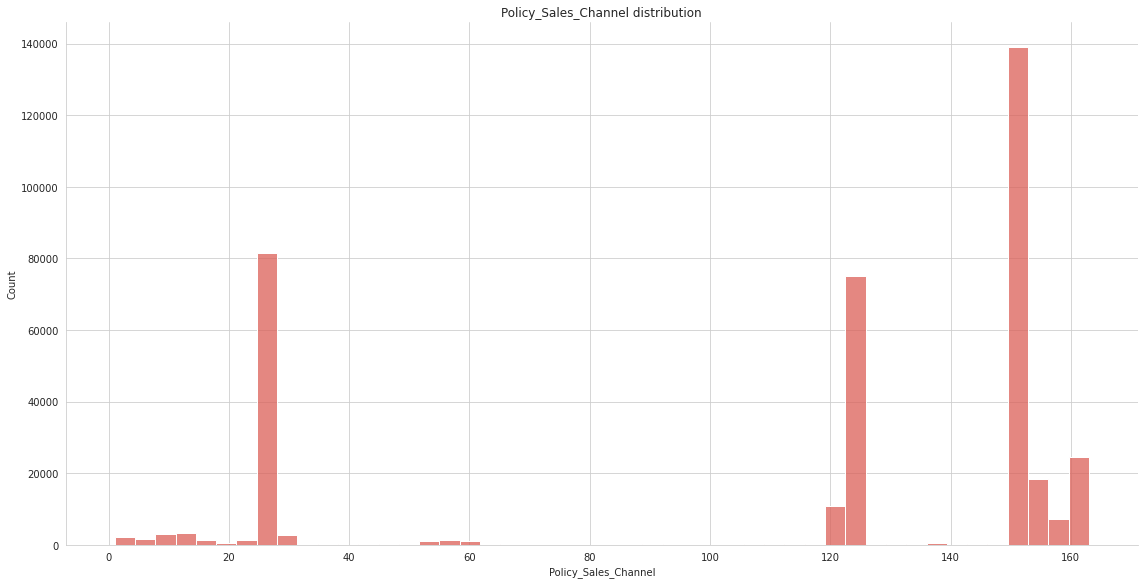

In [96]:
sns.displot(x = train['Policy_Sales_Channel'],  height = 8, aspect=2)
plt.title("Policy_Sales_Channel distribution")
plt.show()

In [97]:
print("Channel #nr-s reaching the highest nr of customers:")
print(train[(train["Policy_Sales_Channel"] > 140) & (train["Policy_Sales_Channel"] < 160)]["Policy_Sales_Channel"].value_counts().sort_values(ascending=False).head(1))
print(train[(train["Policy_Sales_Channel"] > 20) & (train["Policy_Sales_Channel"] < 30)]["Policy_Sales_Channel"].value_counts().sort_values(ascending=False).head(1))
print(train[(train["Policy_Sales_Channel"] > 120) & (train["Policy_Sales_Channel"] < 140)]["Policy_Sales_Channel"].value_counts().sort_values(ascending=False).head(1))

Channel #nr-s reaching the highest nr of customers:
152.0    134784
Name: Policy_Sales_Channel, dtype: int64
26.0    79700
Name: Policy_Sales_Channel, dtype: int64
124.0    73995
Name: Policy_Sales_Channel, dtype: int64


> **Observations**:
* Most of the customers were reached through channels 152, 26 and 124.

Similarly, as in case of the Region_Code feature, we can observe that the Policy_Sales_Channel codes also take all the values in the range 0-160. 

In order to better visualize the plots, we differentiate again 3 categories, as indicated by the 4 peak values and distribute the policy channels into these categories:
* Channel_A : those channels which helped reaching more than 100000 customers. These are the most used communication channels.
* Channel_B: those channels on which the company can reach around 75000-100000 customers
* Channel_C: which can reach out to between 10000-75000 customers
* Channel_D: which can reach out less than 10000 customers. These are the least used communication channels.

In [98]:
x = train['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 75000<x<100000 else 'Channel_C' if 10000<x<=75000 else 'Channel_D') 
category_map = dict(zip(x.keys(),x.values))
train['Policy_Sales_Channel_Group'] = train['Policy_Sales_Channel'].map(category_map) 

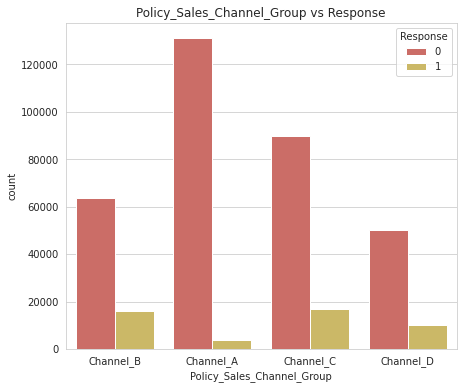

In [99]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'Policy_Sales_Channel_Group', data = train, hue='Response')
plt.title("Policy_Sales_Channel_Group vs Response")
plt.show()

> **Observations**:
* From the plot, it show that Channel_B and Channel_C are the most effective ways of reaching the customers in order to inform them about the possibility of a car insurance, as they have the most positive responses. 
* Channel_A seems to be the worst choice as it has few positive responses and it also had the most negative responses.

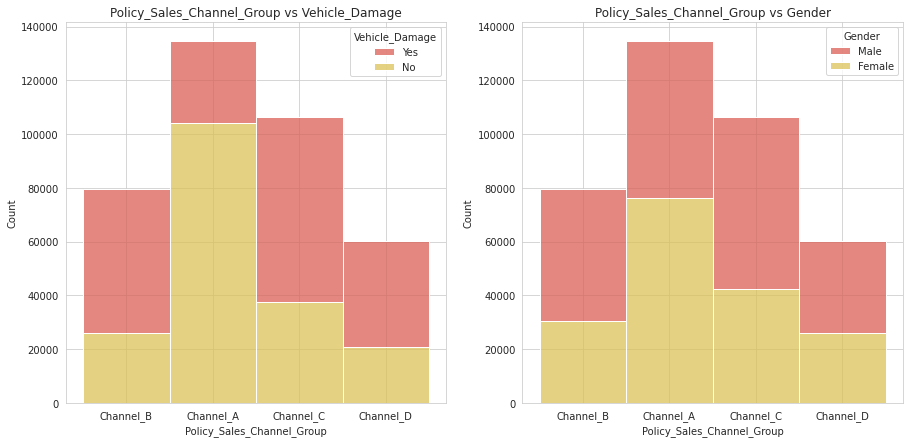

In [100]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,7))

sns.histplot(binwidth=0.5, hue="Vehicle_Damage", 
                 x="Policy_Sales_Channel_Group", data=train, 
                 stat="count", multiple="stack",ax=ax1)
ax1.set_title("Policy_Sales_Channel_Group vs Vehicle_Damage")

sns.histplot(binwidth=0.5, hue="Gender", 
                 x="Policy_Sales_Channel_Group", data=train, 
                 stat="count", multiple="stack",ax=ax2)
ax2.set_title("Policy_Sales_Channel_Group vs Gender")

plt.show()

> **Observations**:
* *Policy_Sales_Channel_Group vs Vehicle_Damage*: Customers reached through Channel_A are the least likely to have damaged their vehicles before, while more customers, reached through Channel_C, claimed to have had damaged vehicles before.
* *Policy_Sales_Channel_Group vs Gender*: Female customers were more likely to be reached out through Channel_A, while male customers on the other hand, could be reached out more likely on Channel_C and Channel_B.

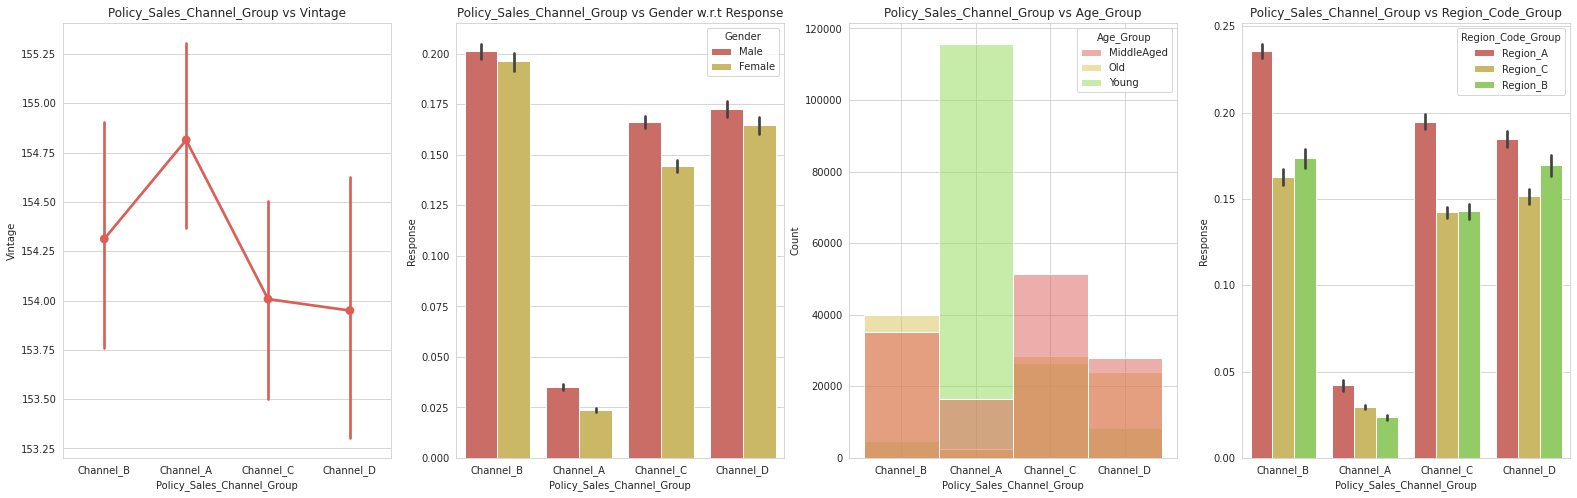

In [101]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(1, 4, figsize=(27,8))

sns.pointplot( y="Vintage", x="Policy_Sales_Channel_Group", data=train,ax=ax1)
ax1.set_title("Policy_Sales_Channel_Group vs Vintage")

sns.barplot( y = 'Response', hue = 'Gender',x="Policy_Sales_Channel_Group", data=train,ax=ax2)
ax2.set_title("Policy_Sales_Channel_Group vs Gender w.r.t Response")

sns.histplot( hue="Age_Group", x="Policy_Sales_Channel_Group", data=train,ax=ax3)
ax3.set_title("Policy_Sales_Channel_Group vs Age_Group")

sns.barplot( y = 'Response', hue="Region_Code_Group", x="Policy_Sales_Channel_Group", data=train,ax=ax4)
ax4.set_title("Policy_Sales_Channel_Group vs Region_Code_Group")

plt.show()

> **Observations**:
* *Policy_Sales_Channel_Group vs Vintage*: Customers who have been with the insurance company were reached mainly through channels from category Channel_A, while newer customers through channels from category Channel_D.
* *Policy_Sales_Channel_Group vs Gender*: The number of male and female customers were reached out through each channel is equally distributed, therefore Gender doesn't really affect the distribution. However, interesting to note that the least popular channels to contact customers were proven to be from category Channel_A.
* *Policy_Sales_Channel_Group vs Age_Group*: Most of the Young customers could be reached through channels from category Channel_A, MiddleAged customer were reached through channels from categories Channel_C and Channel_D, while Old customers through channels from categories Channel_C.
* *Policy_Sales_Channel_Group vs Region_Code_Group*: Most of the customers from regions of category Region_A were reached through channels from Channel_B. The customers from Region_B and Region_C were mainly reached through Channel_B and Channel_D. Again, through Channel_A were reached the least amount of customers, independent of region.

# 3. Data cleaning

Before starting to build the model to predict if a customer would be interested in vehicle insurance, we should prepare the dataset by removing the invalid (empty) or unecessary data.


In [127]:
# copy the initially loaded data
train_prep = train_data.copy()
train_prep.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Remove null (empty) values if any

It seems that there are no features with empty values, each has 381109 non-null values, so no line has to be removed or filled with some default value.

In [128]:
train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [129]:
# Another way for checking for missing values
train_prep.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# 4. Data processing

## Encoding categorical features
As we have seen, some of these categorical features, mainly those which represent more than 2 (binary) categories, contain values in form of a text, which have to be encoded using numerical labels in order to use them later for our model.

Using a **LabelEncoder** we can assign a unique numerical code for each distinct *binary* category inside a feature, and the final form of the data becomes:
* for binary categories 0 represents if the property is present, 1 if it is missing, for ex. having or not having Previous Damage to the vehicle. In case of Gender, 1 means 'Male', while 0 means 'Female'.

For categories where the order matters, such as Vehicle_Age we can use an **OrdinalEncoder**:
* as for the categories with multiple values, in this case only the Vehicle_Age, 0 stands for '1-2 Years', 1 means having '< 1 Years' and 2 for '> 2 Years.

In [130]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# assign labels for each category
label_encoder = LabelEncoder()
categorical_features = ['Gender','Vehicle_Damage']
train_prep[categorical_features] = train_prep[categorical_features].apply(label_encoder.fit_transform)
ordinal_encoder = OrdinalEncoder()
train_prep[['Vehicle_Age']] = ordinal_encoder.fit_transform(train_prep[['Vehicle_Age']])
train_prep.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2.0,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0.0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2.0,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1.0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1.0,0,27496.0,152.0,39,0


## Removing outlier values for numerical features (Skew-correct)

Remove the values which are very far from the majority of the values, because they could cause problems and introduce errors, distortions in the prediction model. This approch can be applies for the Annual_Premium feature, as it contains outlier values, as previously shown in the plots.

In [131]:
# compute the upper limit which represents a threshold for filtering out the outlier values
def get_upper_limit(x):
  upper_limit = 2.5 * x.quantile(0.75)  - 1.5 * x.quantile(0.25)
  return upper_limit

In [132]:
upper_limit_for_Annual_Premium = get_upper_limit(train_prep['Annual_Premium'])

# remove outlier values based on the previously computed UpperLimit
train_prep['Annual_Premium'] = np.where(train_prep['Annual_Premium'] > upper_limit_for_Annual_Premium, upper_limit_for_Annual_Premium, train_prep['Annual_Premium'])

## Scaling

We use Mix Max Scaler to scale down the independent features:

In [133]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
# normalize the data to fit in the scale of [0,1] 
train_prep['Annual_Premium'] = scaler.fit_transform(train_prep['Annual_Premium'].values.reshape(-1,1))
train_prep['Age'] = scaler.fit_transform(train_prep['Age'].values.reshape(-1, 1))
train_prep['Region_Code'] = scaler.fit_transform(train_prep['Region_Code'].values.reshape(-1, 1))
train_prep['Policy_Sales_Channel'] = scaler.fit_transform(train_prep['Policy_Sales_Channel'].values.reshape(-1, 1))

In [134]:
train_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.000000,190555.000000,285832.000000,381109.0
Gender,381109.0,0.540761,0.498336,0.0,0.000000,1.000000,1.000000,1.0
Age,381109.0,0.289578,0.238640,0.0,0.076923,0.246154,0.446154,1.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.000000,1.000000,1.000000,1.0
Region_Code,381109.0,0.507477,0.254421,0.0,0.288462,0.538462,0.673077,1.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.000000,0.000000,1.000000,1.0
Vehicle_Age,381109.0,0.516388,0.577698,0.0,0.000000,0.000000,1.000000,2.0
Vehicle_Damage,381109.0,0.504877,0.499977,0.0,0.000000,1.000000,1.000000,1.0
Annual_Premium,381109.0,0.464344,0.261150,0.0,0.367433,0.490006,0.620460,1.0
Policy_Sales_Channel,381109.0,0.685397,0.334593,0.0,0.172840,0.814815,0.932099,1.0


# 5. Analyzing correlation between features

In order to determine which features have a greater influence on the Response, it is not enough to observe them individually, as they could influence one another in some way, therefore we are curious to find a relationship/correlation between some of the features and to isolate features that are completely independent of the others and may have no relevance to the result.

For finding the correlation between features, we can use Pearsson's formula for correlation, already implemented in the Pandas library. For categorical features we apply factorization before calling the correlation function.

In [135]:
# corr_matrix = train_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_matrix = train_prep.corr()
corr_matrix["Response"].sort_values(ascending=False)

Response                1.000000
Vehicle_Damage          0.354400
Age                     0.111147
Gender                  0.052440
Annual_Premium          0.022054
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Vehicle_Age            -0.104078
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

Attributes which influence positively the Response attribute:
* **Vehicle_Damage**
* **Age**
* **Gender**
* **Annual_Premium**
* **Region_Code**
* **Driving_License**



The correlation between the independent attributes and the target feature, Response, can be better understood when looking at a heatmap:

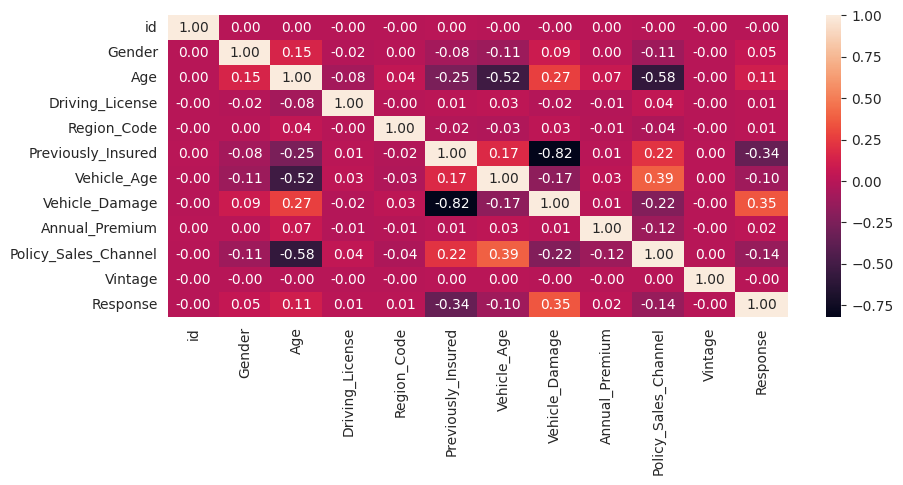

In [136]:
# generate a heatmap
fig, ax1 = plt.subplots(figsize=(10, 4), dpi=100)
sns.heatmap(corr_matrix, annot=True,fmt="0.2f", ax=ax1)
plt.show()

> At first glance, we can already tell from the heatmap which features have little to no effect on the result, the ones with correlation values very close to 0 for every other feature are: 
* **id**: it's completely independent of the other features, and also of the target feature, Response, therefore it is useless for the model.
* **Vintage**: also 0 correlation with all the other features.

> We can also see that, **Vehicle_Damage** has the highest positive influence on the Response feature's value, while **Previously_Insured** has the highest negative influence. These 2 features are strongly negatively correlated, having correlation factor -0.82.

In other words, those who have not been previously insured and had their cars damaged in the past, would be more interested in a car insurance than those, who had an insurance before but their car was not damaged.


Strong positive correlation between the following pairs of features:
* **Vehicle_Age** and **Policy_Sales_Channel**
* **Previously_Insured** and **Policy_Sales_Channel**
* **Age** and **Vehicle_Damage**
* **Age** and **Annual_Premium**
* **Age** and **Gender**

### Visualizing the relationship between strongly correlated features

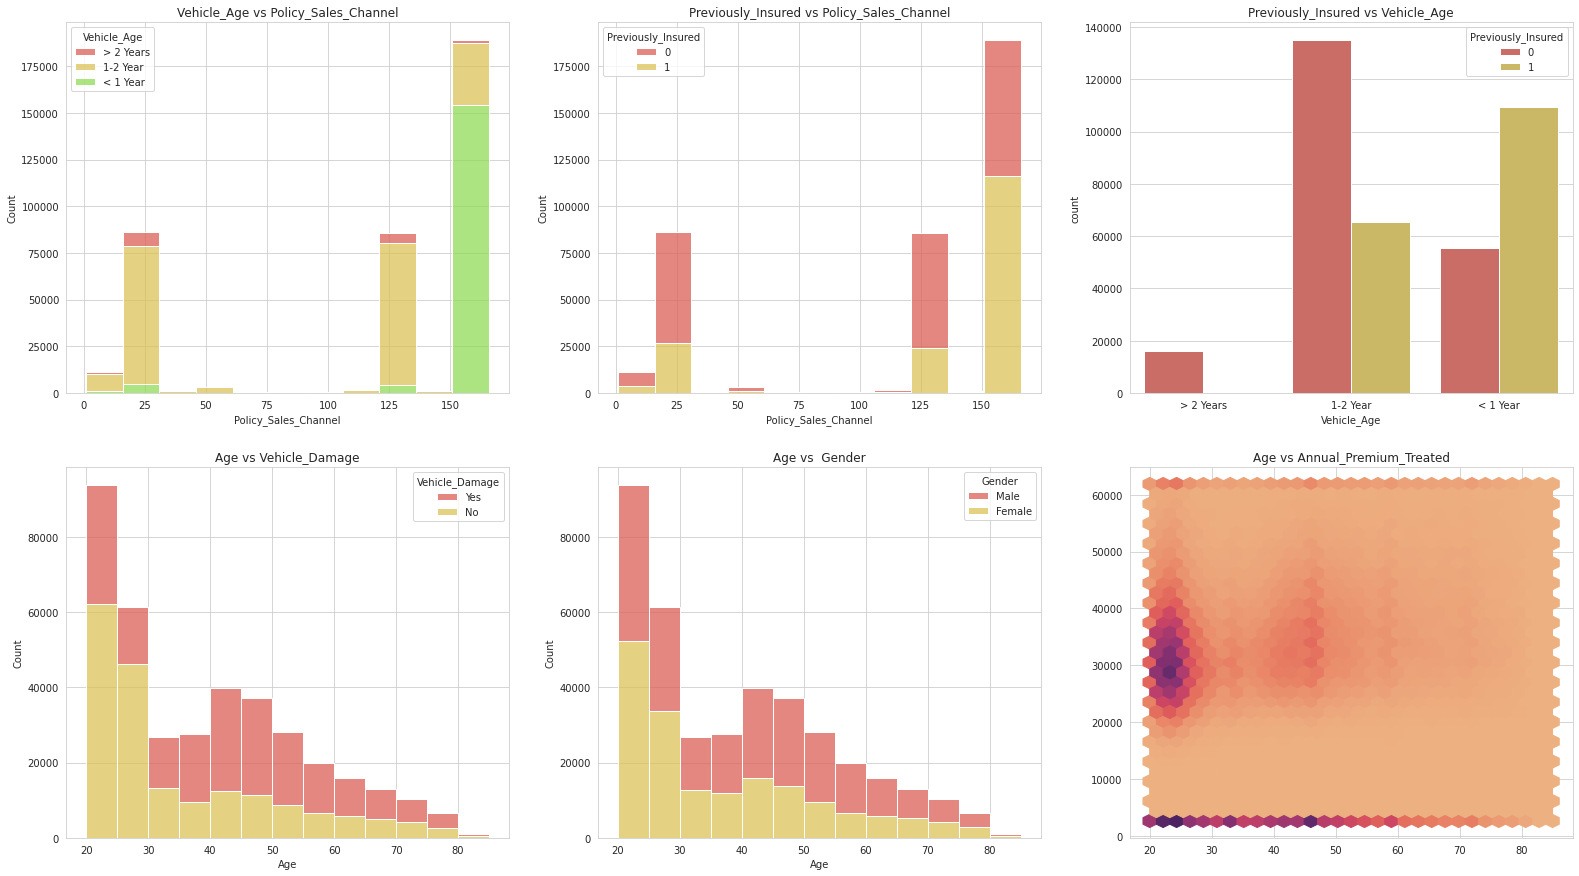

In [137]:
fig, axes = plt.subplots(2, 3, figsize=(27,15))

sns.histplot(binwidth=15, x="Policy_Sales_Channel", 
                 hue="Vehicle_Age", data=train,
                 stat="count", multiple="stack",ax=axes[0][0])
axes[0][0].set_title("Vehicle_Age vs Policy_Sales_Channel")

sns.histplot(binwidth=15,hue="Previously_Insured", 
                 x="Policy_Sales_Channel", data=train,ax=axes[0][1],
             stat="count", multiple="stack")
axes[0][1].set_title("Previously_Insured vs Policy_Sales_Channel")

sns.countplot(hue="Previously_Insured", 
                 x="Vehicle_Age", data=train, ax=axes[0][2])
axes[0][2].set_title("Previously_Insured vs Vehicle_Age")

sns.histplot(binwidth=5, hue="Vehicle_Damage", 
                 x="Age", data=train, 
                 stat="count", multiple="stack",ax=axes[1][0])
axes[1][0].set_title("Age vs Vehicle_Damage")

sns.histplot(binwidth=5, x="Age",hue="Gender", data=train,ax = axes[1][1], stat="count", multiple="stack")
axes[1][1].set_title("Age vs  Gender")

axes[1][2].hexbin(x="Age", y="Annual_Premium_Treated", data=train, gridsize = 30,cmap = "flare" )
axes[1][2].set_title("Age vs Annual_Premium_Treated")

plt.show()

> **Observations**:
* *Vehicle_Age vs Policy_Sales_Channel*: Customers reached through channel 152 are more likely to have newer cars, with age less than 1 year. Those reached through channels 25 and 125 have cars of age 1-2 years.
* *Previously_Insured vs Policy_Sales_Channel*: Customers reached through channel 152 are more likely to have had car insurance before, while those reached through channels 26 and 124 are less likely.
* *Previously_Insured vs Vehicle_Age*: Customers having newer vehicles, less than 1 year, are more likely to have had a car insurance before, while customers owning cars of age 1-2 years, have a higher probability to not have had previous insurance.
* *Age vs Vehicle_Damage*: Younger customers are more likely to have not damaged previously their cars, while MiddleAged and Old customers have a higher probability to have had damaged vehicles before.
* *Age vs Gender*: Among the younger customers there are more females and among the older ones more males.
* *Age vs Annual_Premium_Treated*: Each customer pays roughly the same amount for Annual Premium, but younger customers are in majority, therefore they are more likely to pay an average amount.

## Remove unneccesary features

We clean the dataset by removing the unnecessary features, which don't influence in any way the response, for example:
* **id** of the clients, which is only used to distinguish the different customers.
* **Vintage**, because most of the customers have been with the company for the same amount of time, around 150 days, so it doesn't affect the result much. 

Also, from the correlation matrix it is evident that there is 0 correlation between Vintage, respectively id, and any other attribute.
* **Driving_License** as the majority of the customers own a driving license.


In [138]:
unnecessary_columns = ['id', 'Driving_License', 'Vintage']
train_prep.drop(columns = unnecessary_columns, inplace = True)
train_prep.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,0.369231,0.538462,0,2.0,1,0.638245,0.154321,1
1,1,0.861538,0.057692,0,0.0,0,0.521510,0.154321,0
2,1,0.415385,0.538462,0,2.0,1,0.601797,0.154321,1
3,1,0.015385,0.211538,1,1.0,0,0.438540,0.932099,0
4,0,0.138462,0.788462,1,1.0,0,0.419591,0.932099,0


# Analysis Summary

Studying the customer's data with respect to their response, we arrive to the conclusion that the insurance company should target customers who:
1. have a driving license
3. have vehicles of age older than 1 year
4. had not been previously insured
5. had vehicle damage in the past
6. middle-aged, having an age between 30-50 or older, as younger customers have shown less interest in insurance
7. come from regions from category Region_A, for example region 28.
8. can be reached out through the top policy sales channels 152, 26 or 124.